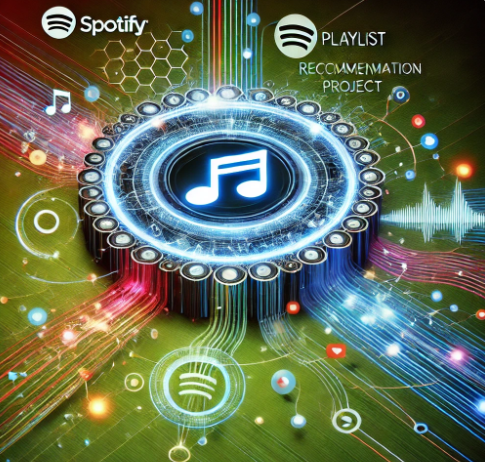

# ***Project Title: Building a Personalized Playlist Recommendation System with Spotify Data***

**Business Question**

"How can we develop a system to recommend personalized playlists to users, leveraging playlist data alone to identify contextual relationships between songs and generate relevant suggestions for a given input song?"

**Overview**

This project aims to answer the business question by analyzing and preprocessing Spotify playlist data to uncover patterns and relationships between songs. By leveraging the co-occurrence of tracks within user-created playlists, we can identify contextual similarities between songs and build a personalized recommendation system.

The dataset is a large collection of user playlists, which provides a unique opportunity to analyze song combinations and infer meaningful relationships without requiring additional metadata such as user preferences or song audio features.

**Objective**

The primary goal is to prepare and process the dataset to create a foundation for building a playlist recommendation system using techniques like Word2Vec and other Natural Language Processing (NLP) methods.
This involves extracting meaningful insights from playlist data alone and ensuring the dataset is clean, consistent, and ready for embedding generation.

**Dataset Features**
The Spotify dataset contains the following key attributes:

user_id: A unique identifier for the user who created the playlist.

artistname: The artist of the track.

trackname: The title of the track.

playlistname: The name of the playlist where the track appears.

**Challenges**

Large Dataset Size:

The dataset consists of over 12.7 million rows, making processing and analysis computationally intensive.

Missing Values:

Some records contain missing values in critical columns like artistname, trackname, or playlistname.

Inconsistent Data:

Variability in formatting, such as mixed-case text, special characters, and duplicates.

Outliers:

Playlists with an unusually large number of tracks can skew analysis and distort relationships.

**EDA and Preprocessing Plan**

Exploratory Data Analysis (EDA)
The focus areas of EDA include:

Playlist Length Analysis:

Understand the distribution of playlist sizes and identify outliers.
Group playlists by the number of tracks to observe user behavior patterns.

User Activity:

Analyze the number of playlists per user and the number of unique tracks contributed by each user.

Top Artists and Tracks:

Identify the most frequently occurring artists and tracks in the dataset.

Data Quality Check:

Inspect for missing values, duplicates, and irregularities in text formatting (e.g., special characters).

**Preprocessing Steps**

Handle Missing Values:

Drop or fill null values in critical columns (artistname, trackname, playlistname).

Example: Replace missing artist or track names with placeholders like "unknown_artist".

Normalize Text:

Convert all text to lowercase for consistency.

Remove leading/trailing spaces and special characters.

Handle special letters using normalization (e.g., "Mötley Crüe" → "motley crue").

Remove Duplicates:

Eliminate duplicate rows to improve data quality.

Analyze and Cap Playlist Lengths:

Cap excessively long playlists (e.g., more than 500 tracks) or remove outliers entirely to maintain balance.

Tokenize Playlists:

Transform playlists into tokenized sequences of tracks, which will serve as input for the recommendation model.

Generate Playlist Statistics:

Calculate metrics like average playlist length, unique tracks per playlist, and user contribution to further refine data insights.

**Approach to Recommendation System**

The recommendation system will utilize Word2Vec embeddings to map songs into a high-dimensional space based on their co-occurrence within playlists. Key steps include:

Input Preparation:

Tokenize playlists into sequences of track names.
Train a Word2Vec model to generate vector embeddings for each track.

Similarity Calculation:
Use cosine similarity between track embeddings to identify similar songs for recommendations.

Output:

For a given input song, recommend a set of tracks that frequently co-occur with it in playlists.

**Expected Outcome**

A cleaned and processed dataset ready for Word2Vec embedding generation.

Insights into playlist patterns, user behavior, and popular tracks/artists.

A proof-of-concept recommendation system that suggests personalized playlists or songs based solely on playlist data.

# Recognizing and Handling bad lines (expected 4 elements separated by comas and got different number of elements)

In [ ]:
import gdown
import pandas as pd

# Define the Google Drive file ID
file_id = '189D-QIh1J_3_S6qM7It3f20F0iN7Wvy-'

# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output CSV file path
output_csv_path = 'spotify_dataset.csv'

# Download the file using gdown
gdown.download(download_url, output_csv_path, quiet=False)

# Load the CSV into a DataFrame
df_original = pd.read_csv(output_csv_path)

# Display the first few rows
df_original.head()


Downloading...
From (original): https://drive.google.com/uc?export=download&id=189D-QIh1J_3_S6qM7It3f20F0iN7Wvy-
From (redirected): https://drive.google.com/uc?export=download&id=189D-QIh1J_3_S6qM7It3f20F0iN7Wvy-&confirm=t&uuid=a11e48dd-75f2-4869-b29f-77b4db486db9
To: /content/spotify_dataset.csv
100%|██████████| 1.18G/1.18G [00:11<00:00, 101MB/s] 


ParserError: Error tokenizing data. C error: Expected 4 fields in line 14735, saw 5


Can't open the direct link because of bad lines in the dataset, lets check malformed rows:

In [ ]:
with open(output_csv_path, 'r') as file, open('malformed_rows.csv', 'w') as malformed_file:
    for i, line in enumerate(file):
        if len(line.split(',')) != 4:  # Expected number of columns
            malformed_file.write(f"Line {i + 1}: {line}")


Expected 4 elements (=4 columns: user id, artistname, trackname, playlist) and got different result, meaning we need to put a quotechar = ' " ', that will recognize an element as one and not more than that because an element comes with brackets because it's a string.

# Direct link to the Spotify_playlist.csv dataset (no need to download)

In [ ]:
import gdown
import pandas as pd

# Define the Google Drive file ID
file_id = '189D-QIh1J_3_S6qM7It3f20F0iN7Wvy-'

# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output CSV file path
output_csv_path = 'spotify_dataset.csv'

# Download the file using gdown
gdown.download(download_url, output_csv_path, quiet=False)

# Load the CSV with proper handling of quoted fields
df_original = pd.read_csv(output_csv_path, quotechar='"',escapechar='\\', on_bad_lines='skip') # Some elements in one row have more than 4 elements (meaning 4 columns) because some track names (for example) contain comas
#so we implement a quotechasr='"' so a song will be read as one element.

# Display the first few rows
df_original.head()


Downloading...
From (original): https://drive.google.com/uc?export=download&id=189D-QIh1J_3_S6qM7It3f20F0iN7Wvy-
From (redirected): https://drive.google.com/uc?export=download&id=189D-QIh1J_3_S6qM7It3f20F0iN7Wvy-&confirm=t&uuid=aa206aaa-6b00-4b7d-ae86-aeabbf5ebbea
To: /content/spotify_dataset.csv
100%|██████████| 1.18G/1.18G [00:22<00:00, 52.3MB/s]


,user_id,"""artistname""","""trackname""","""playlistname"""
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010


# Preliminary EDA (df=data frame)

escapechar handles the backslash \

quotechar handles the coma inside a string ""

In [ ]:
import gdown
import pandas as pd

# Direct link to your Google Drive file
file_id = '189D-QIh1J_3_S6qM7It3f20F0iN7Wvy-'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the file to a local path
output_csv_path = 'spotify_dataset.csv'
gdown.download(download_url, output_csv_path, quiet=False)

# Load the CSV with pandas
df = pd.read_csv(output_csv_path, quotechar='"',escapechar='\\', keep_default_na=True, on_bad_lines='warn')
print(df.head())

Streaming output truncated to the last 5000 lines.
Skipping line 6258854: expected 4 fields, saw 5
Skipping line 6258856: expected 4 fields, saw 6
Skipping line 6258858: expected 4 fields, saw 5
Skipping line 6258861: expected 4 fields, saw 5
Skipping line 6258863: expected 4 fields, saw 5
Skipping line 6258870: expected 4 fields, saw 5
Skipping line 6258873: expected 4 fields, saw 5
Skipping line 6258874: expected 4 fields, saw 5
Skipping line 6258875: expected 4 fields, saw 5
Skipping line 6258878: expected 4 fields, saw 5
Skipping line 6258879: expected 4 fields, saw 5
Skipping line 6259203: expected 4 fields, saw 5
Skipping line 6272218: expected 4 fields, saw 5
Skipping line 6273536: expected 4 fields, saw 5
Skipping line 6273560: expected 4 fields, saw 5
Skipping line 6274127: expected 4 fields, saw 5
Skipping line 6274855: expected 4 fields, saw 5
Skipping line 6280493: expected 4 fields, saw 7
Skipping line 6284775: expected 4 fields, saw 5
Skipping line 6284802: expected 4 fie

                            user_id                      "artistname"  \
0  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
2  9cc0cfd4d7d7885102480dd99e7a90d6                      Tiffany Page   
3  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
4  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   

                                         "trackname"  "playlistname"  
0               (The Angels Wanna Wear My) Red Shoes  HARD ROCK 2010  
1  (What's So Funny 'Bout) Peace, Love And Unders...  HARD ROCK 2010  
2                                   7 Years Too Late  HARD ROCK 2010  
3                              Accidents Will Happen  HARD ROCK 2010  
4                                             Alison  HARD ROCK 2010  


How many rows in the malformed rows, have less than 4 elements : (answer is 0)

In [ ]:
# Define the file path
file_path = 'spotify_dataset.csv'  # Update with your actual file path

# Open the file and check for malformed rows
malformed_rows = []
with open(file_path, 'r') as file:
    for i, line in enumerate(file):
        # Split the row by the delimiter and count elements
        if len(line.split(',')) < 4:  # Adjust '4' to the expected number of columns
            malformed_rows.append((i + 1, line))  # Store the line number and content

# Display malformed rows
print(f"Number of malformed rows: {len(malformed_rows)}")
for line_number, content in malformed_rows[:10]:  # Show the first 10 malformed rows
    print(f"Line {line_number}: {content}")


Number of malformed rows: 0


In [ ]:

# Display basic information
df_original.info()

# Show the first few rows
df_original.head()

# Check for missing values
df_original.isnull().sum()

# Analyze unique values in columns
df_original.nunique()

# Describe the dataset
df_original.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12891680 entries, 0 to 12891679
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   user_id          object
 1    "artistname"    object
 2    "trackname"     object
 3    "playlistname"  object
dtypes: object(4)
memory usage: 393.4+ MB


,user_id,"""artistname""","""trackname""","""playlistname"""
count,12891680,12858108,12891592,12890434
unique,15918,289820,2032043,157504
top,4398de6902abde3351347b048fcdc287,Daft Punk,Intro,Starred
freq,295275,36086,6676,1337085


In [ ]:
# Display basic information
df_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12891680 entries, 0 to 12891679
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   user_id          object
 1    "artistname"    object
 2    "trackname"     object
 3    "playlistname"  object
dtypes: object(4)
memory usage: 393.4+ MB


dataset has successfully loaded with 12,891,680 rows and 4 columns, but the column names have extra quotes (e.g., "artistname", "trackname", "playlistname"), which might cause issues during analysis.

In [ ]:
df.columns = df.columns.str.strip().str.replace('"', '')
print(df.columns)

Index(['user_id', 'artistname', 'trackname', 'playlistname'], dtype='object')


In [ ]:
# Show the first few rows
df_original.head()

,user_id,"""artistname""","""trackname""","""playlistname"""
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010


In [ ]:
# Check for missing values
df_original.isnull().sum()


,0
user_id,0
"""artistname""",33572
"""trackname""",88
"""playlistname""",1246


In [ ]:
# Analyze unique values in columns
df_original.nunique()

,0
user_id,15918
"""artistname""",289820
"""trackname""",2032043
"""playlistname""",157504


In [ ]:
# Describe the dataset
df_original.describe(include='all')

,user_id,"""artistname""","""trackname""","""playlistname"""
count,12891680,12858108,12891592,12890434
unique,15918,289820,2032043,157504
top,4398de6902abde3351347b048fcdc287,Daft Punk,Intro,Starred
freq,295275,36086,6676,1337085


In [ ]:
print(df[df['"artistname"'].str.contains(r'\\', na=False)])  # Rows with backslash in artistname
print(df[df['"trackname"'].str.contains(r'\\', na=False)])  # Rows with backslash in trackname
print(df[df['"playlistname"'].str.contains(r'\\', na=False)])  # Rows with backslash in playlistname


KeyError: '"artistname"'

#EDA- extensive - i need to devide into blocks for better understanding but it is based on all knowledge i got from initial EDA i did.

In [ ]:
import pandas as pd

# Step 1: Load the CSV with `quotechar='"'`
df_original = pd.read_csv('spotify_dataset.csv', quotechar='"', on_bad_lines='skip')
df_original.to_csv('step1_loaded.csv', index=False)
print("Step 1 saved: step1_loaded.csv")

# Step 2: Clean column names
df_original.columns = df_original.columns.str.strip().str.replace('"', '')  # Remove quotes and spaces
df_original.to_csv('step2_cleaned_columns.csv', index=False)
print("Step 2 saved: step2_cleaned_columns.csv")

# Step 3: Handle missing values
df_original = df_original.dropna()  # Remove rows with missing values
# Optional: Fill missing values instead of dropping them
# df_original.fillna({'artistname': 'unknown', 'trackname': 'unknown', 'playlistname': 'unknown'}, inplace=True)
df_original.to_csv('step3_handled_missing.csv', index=False)
print("Step 3 saved: step3_handled_missing.csv")

# Step 4: Convert all string columns to lowercase
string_columns = df_original.select_dtypes(include='object').columns  # Identify string columns
df_original[string_columns] = df_original[string_columns].apply(lambda col: col.str.lower())
df_original.to_csv('step4_lowercase.csv', index=False)
print("Step 4 saved: step4_lowercase.csv")

# Step 5: Duplicate Rows
print(f"Number of duplicate rows: {df_original.duplicated().sum()}")
df_original = df_original.drop_duplicates()
df_original.to_csv('step5_removed_duplicates.csv', index=False)
print("Step 5 saved: step5_removed_duplicates.csv")

# Step 6: Distribution Analysis
print(df_original['artistname'].value_counts().head(10)) # Most Frequent Artists

print(df_original['trackname'].value_counts().head(10)) # Most Frequent Tracks

#Save these distributions for review:
df_original['artistname'].value_counts().head(10).to_csv('top10_artists.csv')
df_original['trackname'].value_counts().head(10).to_csv('top10_tracks.csv')

# Step 7: Playlist Diversity
playlist_diversity = df_original.groupby('playlistname')['trackname'].nunique()
playlist_diversity.to_csv('step7_playlist_diversity.csv')
print("Step 7 saved: step7_playlist_diversity.csv")

df_original['artistname'] = df_original['artistname'].str.strip()
df_original['trackname'] = df_original['trackname'].str.strip()
df_original['playlistname'] = df_original['playlistname'].str.strip()

# Step 8: Normalize or Standardize Text
#Remove extra spaces, special characters, or unusual formatting in text fields
df_original.to_csv('step8_normalized_text.csv', index=False)
print("Step 8 saved: step8_normalized_text.csv")

# Step 9: Check for Unusual Values
print(df_original[df_original['artistname'].str.len() < 2])  # Artists with very short names
print(df_original[df_original['trackname'].str.len() < 2])  # Tracks with very short names
print(df_original[df_original['playlistname'].str.len() < 2])  # Playlists with very short names

# filter these values out:
df_original = df_original[df_original['artistname'].str.len() >= 2]
df_original = df_original[df_original['trackname'].str.len() >= 2]
df_original = df_original[df_original['playlistname'].str.len() >= 2]

df_original.to_csv('step9_filtered_unusual_values.csv', index=False)
print("Step 9 saved: step9_filtered_unusual_values.csv")

# Step 10: Create Summary Statistics
summary = df_original.describe(include='all')
summary.to_csv('step10_summary_statistics.csv')
print("Step 10 saved: step10_summary_statistics.csv")

# Step 11:Identify Relationships
#Track Count per Artist
track_count_per_artist = df_original.groupby('artistname')['trackname'].nunique()
track_count_per_artist.to_csv('step11_track_count_per_artist.csv')
print("Step 11 saved: step11_track_count_per_artist.csv")

#Tracks per Playlist
tracks_per_playlist = df_original.groupby('playlistname')['trackname'].nunique()
tracks_per_playlist.to_csv('step11_tracks_per_playlist.csv')
print("Step 11 saved: step11_tracks_per_playlist.csv")

# Step 12: Save Cleaned and Processed Data
#Save Cleaned and Processed Data
df_original.to_csv('final_cleaned_dataset.csv', index=False)
print("Final dataset saved: final_cleaned_dataset.csv")






Step 1 saved: step1_loaded.csv
Step 2 saved: step2_cleaned_columns.csv
Step 3 saved: step3_handled_missing.csv
Step 4 saved: step4_lowercase.csv
Number of duplicate rows: 25183
Step 5 saved: step5_removed_duplicates.csv
artistname
daft punk             36049
coldplay              35521
radiohead             31454
the rolling stones    30746
kanye west            29112
jay z                 28966
eminem                28896
queen                 28010
david bowie           27790
michael jackson       26224
Name: count, dtype: int64
trackname
intro          6712
home           5607
closer         3551
runaway        3350
hold on        3282
radioactive    3188
forever        3067
stay           3006
alive          2940
wake me up     2838
Name: count, dtype: int64
Step 7 saved: step7_playlist_diversity.csv
Step 8 saved: step8_normalized_text.csv
                                   user_id artistname  \
14137     650c4d63a819dbb77cc15a87f407039a              
45135     db937456654d2465292c

# Direct link to final_cleaned_dataset.csv (file after EDA)

In [2]:
import gdown
import pandas as pd

# Define the Google Drive file ID
file_id = '1pw1rhn2FoRoFvdKdq1iSuX6hotUEtn-X'
# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output CSV file path
output_csv_path = 'final_cleaned_dataset.csv'

# Download the file using gdown
gdown.download(download_url, output_csv_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1pw1rhn2FoRoFvdKdq1iSuX6hotUEtn-X
From (redirected): https://drive.google.com/uc?export=download&id=1pw1rhn2FoRoFvdKdq1iSuX6hotUEtn-X&confirm=t&uuid=6d4d79e5-409a-4d97-8786-59cec9951b4b
To: /content/final_cleaned_dataset.csv
100%|██████████| 1.04G/1.04G [00:10<00:00, 97.3MB/s]


'final_cleaned_dataset.csv'

In [3]:
import pandas as pd

# Load the final saved file
df_final = pd.read_csv('final_cleaned_dataset.csv')

# 1. Basic Information
print("Basic Information:")
print(df_final.info())

# 2. Shape of the Dataset
print("\nShape of the Dataset:")
print(f"Number of rows: {df_final.shape[0]}")
print(f"Number of columns: {df_final.shape[1]}")

# 3. Summary Statistics
print("\nSummary Statistics:")
print(df_final.describe(include='all'))  # Include all columns (numeric and categorical)

# 4. Column-Wise Null Check
print("\nMissing Values Per Column:")
print(df_final.isnull().sum())

# 5. Head and Tail (First and Last Rows)
print("\nFirst 5 Rows:")
print(df_final.head())

print("\nLast 5 Rows:")
print(df_final.tail())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12743252 entries, 0 to 12743251
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   artistname    object
 2   trackname     object
 3   playlistname  object
dtypes: object(4)
memory usage: 388.9+ MB
None

Shape of the Dataset:
Number of rows: 12743252
Number of columns: 4

Summary Statistics:
                                 user_id artistname trackname playlistname
count                           12743252   12743249  12743230     12743252
unique                             15864     276963   1841157       137880
top     4398de6902abde3351347b048fcdc287  daft punk     intro      starred
freq                              294834      35890      6704      1330532

Missing Values Per Column:
user_id          0
artistname       3
trackname       22
playlistname     0
dtype: int64

First 5 Rows:
                            user_id                       artistnam

In [4]:
print(f"Shape after step X: {df_final.shape}")


Shape after step X: (12743252, 4)


# Preprocessing of the data

## Step 1: Handling missing values

From last analysis on final_cleaned_dataset.csv we see there are still missing values even after handling them in EDA:

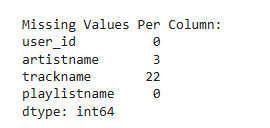

In [5]:
# Display rows with missing values
missing_data = df_final[df_final.isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_data)


Rows with missing values:
                                   user_id            artistname  \
621134    c4f7f2f76ffb91bc97d5d74cac0bb1bc           brunori sas   
691427    4b229cd34de420c309b4e54a07b52777           stoned baby   
795324    3025b16e8aca079113af72ef07cbf693           brunori sas   
1573529   e29513294cd6754142a2f1e1bb54975f        booker t jones   
1603298   4191cfd13e46e23647d408d812280aee              sonzeira   
2319046   8cb1e3faf1c1643c69d1f806cbcc5b1e                  ween   
2459362   853c7d22d041015dbc3b248194331e50         the algorithm   
3969056   a4f65b7929c00088b8bcba010363d375                  ween   
4718645   db61fa74dbd6b564ae115f42370163d6                benjie   
4737086   f82a1fe28c47aed215b6547fc55fab95         the algorithm   
4837169   932d18ffe570c999355cd5d7627ed375             bossa rio   
5099907   7494ee41e5d815b5f88b90e46e321057        booker t jones   
5765602   5debd9fcd3621c27d6200880bc3e187e  holographic dissolve   
6270819   fba23f128b62

Analysis of Missing Data
Missing artistname:

There are rows where artistname is missing but other columns (like trackname and playlistname) have valid data.
Action: You can fill these with a placeholder like "unknown_artist".
Missing trackname:

Rows with missing trackname lack critical information, as the track is essential for playlist analysis.
Action: These rows should ideally be dropped, as trackname is required for modeling.
playlistname:

There are no missing values in this column, so no action is required here.

In [5]:
# Fill missing artist names with 'unknown_artist'
df_final['artistname'] = df_final['artistname'].fillna('unknown_artist')

# Drop rows with missing track names, as they lack essential information
df_final = df_final.dropna(subset=['trackname'])

# Verify that there are no missing values
print("Missing values after handling:")
print(df_final.isnull().sum())

# Save the cleaned dataset
df_final.to_csv('processed_data_missing_handled.csv', index=False)
print("Processed data with missing values handled saved: processed_data_missing_handled.csv")


Missing values after handling:
user_id         0
artistname      0
trackname       0
playlistname    0
dtype: int64
Processed data with missing values handled saved: processed_data_missing_handled.csv


Now there are no missing values.

Rows with missing artistname will have "unknown_artist" as a placeholder.

Rows with missing trackname will be dropped.

The dataset will be free of missing values, ready for further preprocessing or analysis.

## Step 2: Analysis of Cleaned Data (after handling all missing values)

In [6]:
print(f"Shape after step X: {df_final.shape}")

Shape after step X: (12743230, 4)


In [7]:
# Count the total occurrences of 'unknown_artist'
unknown_artist_count = df_final['artistname'].value_counts().get('unknown_artist', 0)

# Display the count
print(f"Total occurrences of 'unknown_artist': {unknown_artist_count}")


Total occurrences of 'unknown_artist': 3


## Step 3: Analyze Playlist Lengths

Use the number of tracks per playlist to understand distribution and identify outliers.


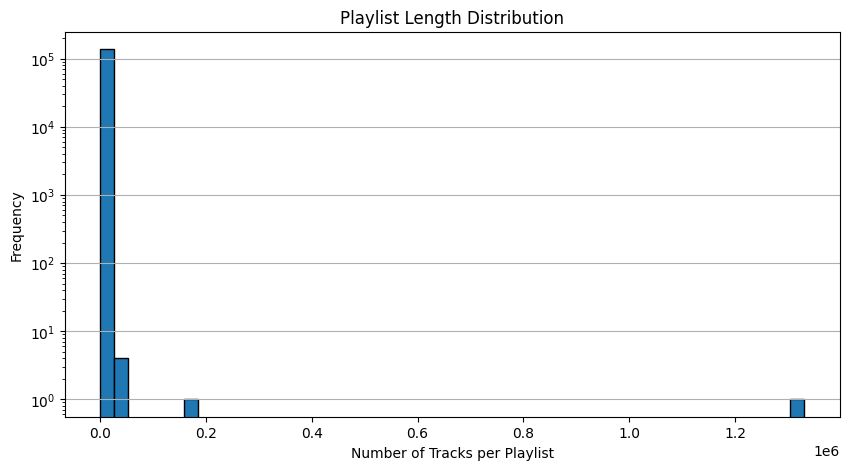

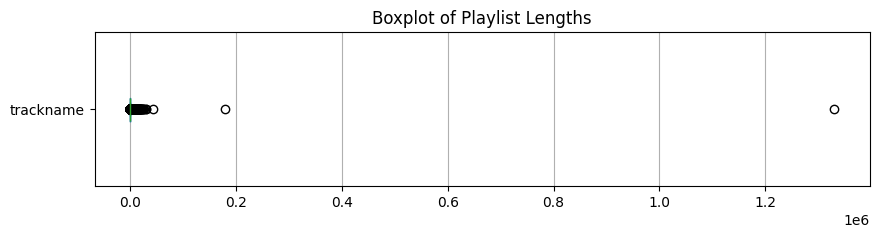

Playlist Length Statistics:
count    1.378800e+05
mean     9.242261e+01
std      3.642729e+03
min      1.000000e+00
25%      1.100000e+01
50%      2.100000e+01
75%      5.200000e+01
max      1.330529e+06
Name: trackname, dtype: float64


In [9]:
import matplotlib.pyplot as plt

# Calculate playlist lengths
playlist_lengths = df_final.groupby('playlistname')['trackname'].count()

# Save the playlist lengths for reference
playlist_lengths.to_csv('playlist_lengths.csv')

# Plot histogram for playlist lengths
plt.figure(figsize=(10, 5))
playlist_lengths.plot(kind='hist', bins=50, edgecolor='black', logy=True)
plt.title('Playlist Length Distribution')
plt.xlabel('Number of Tracks per Playlist')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(10, 2))
playlist_lengths.plot(kind='box', vert=False)
plt.title('Boxplot of Playlist Lengths')
plt.grid(axis='x')
plt.show()

# Basic statistics of playlist lengths
print("Playlist Length Statistics:")
print(playlist_lengths.describe())



Looking at the Playlist Length Statistics, here's what each metric tells us:

Key Metrics:

Count (count):

**Total number of playlists analyzed: 137,880.** This is the total number of **unique playlists** in the dataset.

Mean (mean):

Average number of tracks per playlist: ~92.42. On average, **playlists contain around 92 tracks.** This value is skewed upwards due to outliers (e.g., extremely long playlists).

Standard Deviation (std):

**Standard deviation is very large: ~3,642.73. This indicates that playlist lengths vary widely,** with some being extremely large (outliers).

Minimum (min):

**The smallest playlist has only 1 track.** This might indicate edge cases, such as test or private playlists.

25th Percentile (25%):

**25% of playlists have 11 or fewer tracks.** This suggests that a significant number of playlists are **relatively short.**

Median (50%):

The median playlist length is 21 tracks, meaning that half the playlists contain 21 tracks or fewer. This is a more realistic representation of typical playlist length compared to the mean.

75th Percentile (75%):

75% of playlists have 52 tracks or fewer. This suggests that most playlists are moderately sized, while only **a small proportion are large.**

Maximum (max):

**The largest playlist has 1,330,529 tracks! This is an extreme outlier** and likely represents an aggregated or error-prone playlist.

### The longest playlist is: starred, Number of unique songs in the longest playlist: 417336

In [10]:
# Find the name of the longest playlist
longest_playlist_name = df_final.groupby('playlistname')['trackname'].count().idxmax()

# Filter the longest playlist
longest_playlist = df_final[df_final['playlistname'] == longest_playlist_name]

# Count unique songs in the longest playlist
unique_songs_count = longest_playlist['trackname'].nunique()

print(f"The longest playlist is: {longest_playlist_name}")
print(f"Number of unique songs in the longest playlist: {unique_songs_count}")


The longest playlist is: starred
Number of unique songs in the longest playlist: 417336


### WORD ANALYSIS EDA on RAW cleaned data

What This Analysis Provides:

1. Most Frequent Words: Common patterns and repetitive words.

2. Rare Words: Insights into outliers and potentially noisy data.

3. Unusual Characters: Words with special characters or numbers.

4. Stop Words: High-frequency but less meaningful words to consider removing.

5. Case Sensitivity: Identifying inconsistencies in capitalization.

6. Track Lengths: Evaluating word count distribution for tracks.

### Step 1: Word Frequency Analysis

Most common words:
[('the', 4054468), ('starred', 1337275), ('of', 1212455), ('a', 752283), ('in', 726628), ('you', 716803), ('i', 684184), ('to', 610761), ('and', 585116), ('my', 580685)]


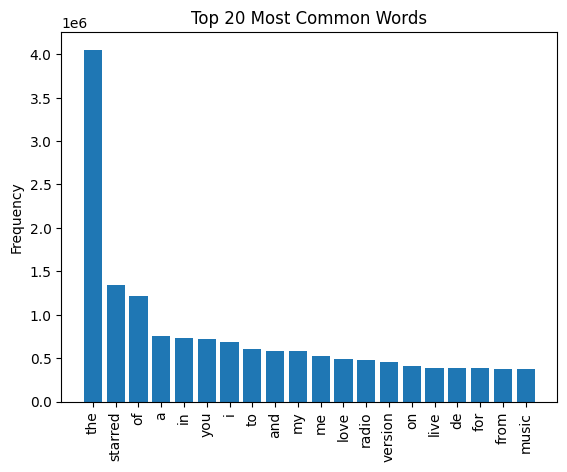

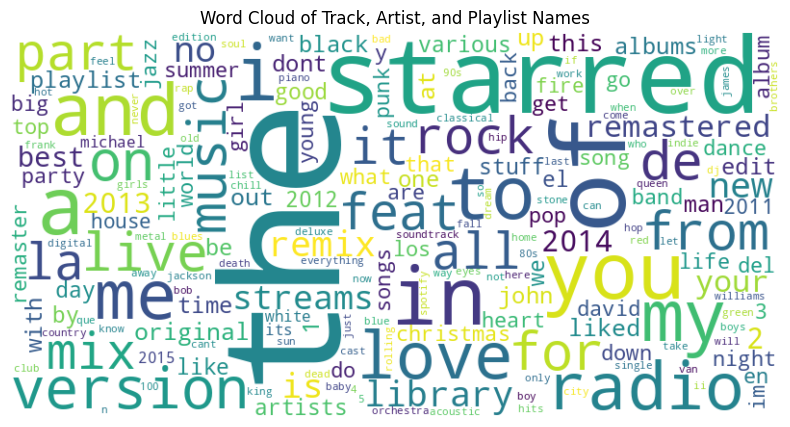

In [11]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all text columns into a single string for analysis
all_text = ' '.join(df_final['trackname'].fillna('') + ' ' +
                    df_final['artistname'].fillna('') + ' ' +
                    df_final['playlistname'].fillna(''))

# Split the text into words
words = all_text.split()

# Count word frequencies
word_counts = Counter(words)

# Display the 10 most common words
print("Most common words:")
print(word_counts.most_common(10))

# Visualize the top 20 words
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("Top 20 Most Common Words")
plt.ylabel("Frequency")
plt.show()

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Track, Artist, and Playlist Names")
plt.show()


### Step 2: Rare and Unique Words

Number of rare words: 180063
Examples of rare words: ['christodoulou', 'barb4ry', 'battlesmallboss', 'battleorochi', 'batenkaitos', 'hortobgyigyan', 'uttejak', 'berges', 'genma', 'unassuming']


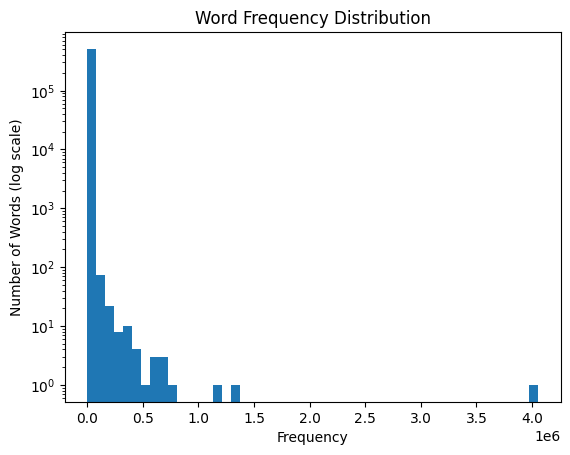

In [12]:
# Identify rare words that occur only once
rare_words = [word for word, count in word_counts.items() if count == 1]
print(f"Number of rare words: {len(rare_words)}")
print("Examples of rare words:", rare_words[:10])

# Visualize the frequency distribution of all words
plt.hist(word_counts.values(), bins=50, log=True)
plt.title("Word Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Number of Words (log scale)")
plt.show()


### Step 3: Unusual Characters or Patterns

In [13]:
import re

# Check for words with unusual characters
unusual_words = [word for word in word_counts.keys() if re.search(r'[^a-zA-Z0-9\s]', word)]
print(f"Number of words with unusual characters: {len(unusual_words)}")
print("Examples of words with unusual characters:", unusual_words[:10])

# Check for numbers in words
numeric_words = [word for word in word_counts.keys() if re.search(r'\d', word)]
print(f"Number of words containing numbers: {len(numeric_words)}")
print("Examples of numeric words:", numeric_words[:10])


Number of words with unusual characters: 1
Examples of words with unusual characters: ['unknown_artist']
Number of words containing numbers: 28660
Examples of numeric words: ['2010', '7', '3', '5', '2012', '1', '2080', 'c418', 'bd08', '0x10c']


### Step 4: Stop Word Analysis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Most common stop words:
[('the', 4054468), ('of', 1212455), ('a', 752283), ('in', 726628), ('you', 716803), ('i', 684184), ('to', 610761), ('and', 585116), ('my', 580685), ('me', 527998)]


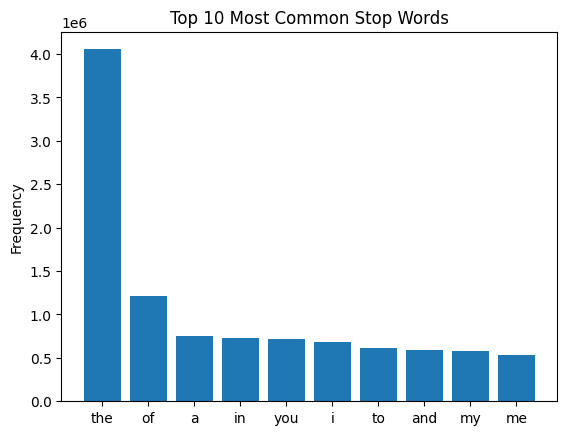

In [14]:
from nltk.corpus import stopwords
import nltk

# Download stop words if not already downloaded
nltk.download('stopwords')

# List of stop words
stop_words = set(stopwords.words('english'))

# Count stop words in the dataset
stop_word_counts = {word: count for word, count in word_counts.items() if word in stop_words}
print("Most common stop words:")
print(sorted(stop_word_counts.items(), key=lambda x: x[1], reverse=True)[:10])

# Visualize stop words
stop_words, counts = zip(*sorted(stop_word_counts.items(), key=lambda x: x[1], reverse=True)[:10])
plt.bar(stop_words, counts)
plt.title("Top 10 Most Common Stop Words")
plt.ylabel("Frequency")
plt.show()


### Step 5: Case Sensitivity Check

In [15]:
# Check for case-sensitive duplicates
case_sensitive_words = [word for word in word_counts.keys() if word.lower() != word]
print(f"Number of case-sensitive duplicates: {len(case_sensitive_words)}")
print("Examples of case-sensitive duplicates:", case_sensitive_words[:10])


Number of case-sensitive duplicates: 0
Examples of case-sensitive duplicates: []


### Step 6: Distribution of Track Lengths

Track name length statistics:
count    1.274323e+07
mean     3.451542e+00
std      2.338094e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      5.100000e+01
Name: track_length, dtype: float64


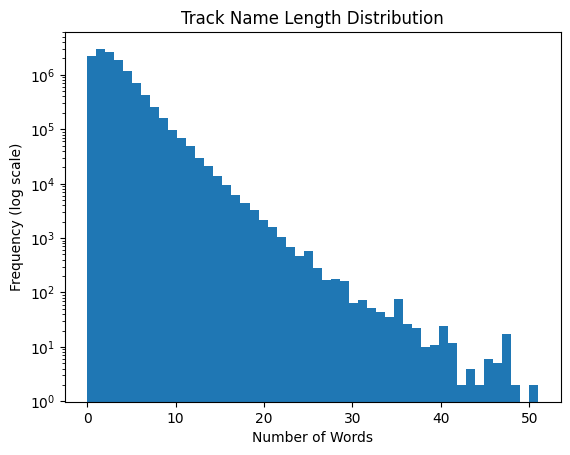

In [16]:
# Calculate track name lengths
df_final['track_length'] = df_final['trackname'].str.split().str.len()

# Describe the track name lengths
print("Track name length statistics:")
print(df_final['track_length'].describe())

# Visualize the distribution
plt.hist(df_final['track_length'].dropna(), bins=50, log=True)
plt.title("Track Name Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency (log scale)")
plt.show()


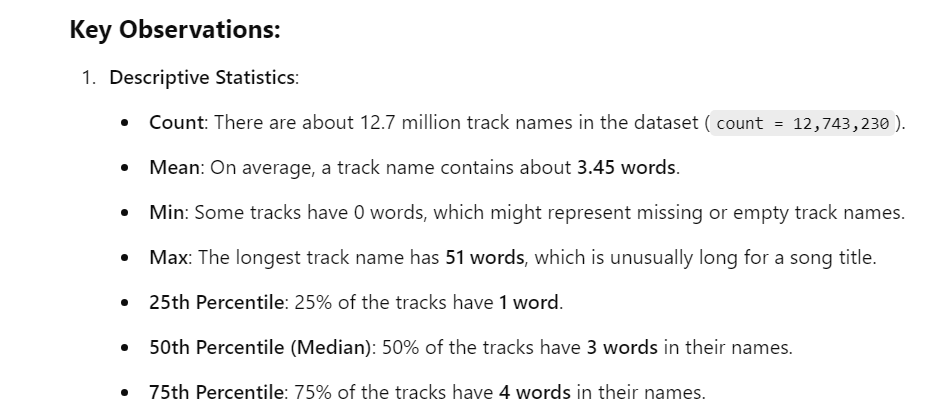

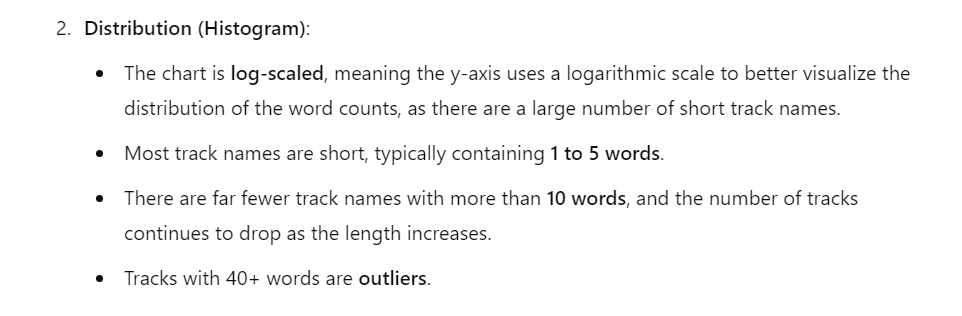

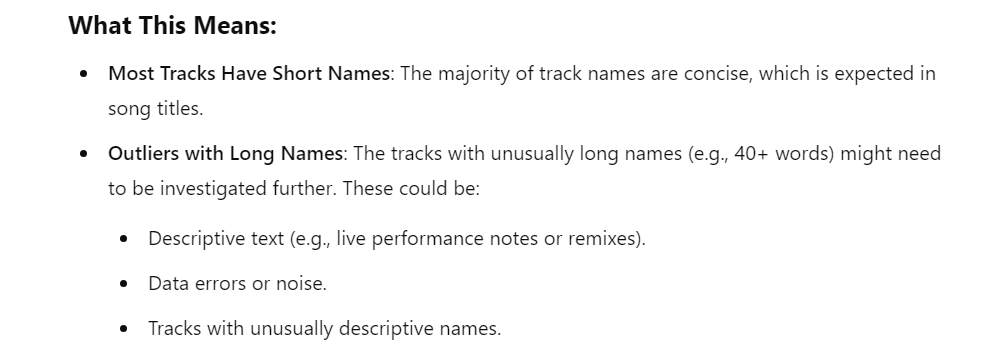

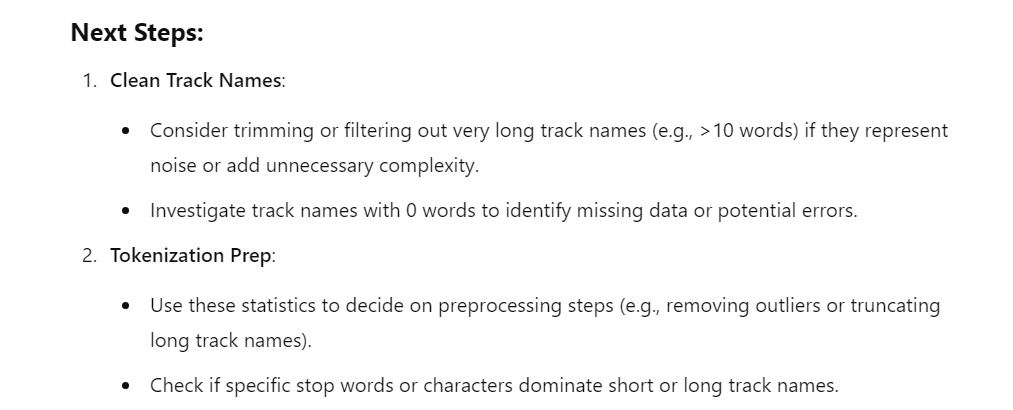

## Step 4: vocabulary and token distributions analysis of 'Starred' playlist (Outlire)

For a Word2Vec model, we primarily focus on analyzing the vocabulary and token distributions rather than diving deep into playlist-specific behaviors.

### Starred playlists a user chose - sample

In [18]:
# Filter playlists named "starred"
starred_playlists = df_final[df_final['playlistname'].str.lower() == 'starred']

# Display the first few rows to verify
print("Starred playlists sample:")
print(starred_playlists.head())


Starred playlists sample:
                              user_id               artistname  \
767  07f0fc3be95dcd878966b1f9572ff670  bill elm  woody jackson   
768  07f0fc3be95dcd878966b1f9572ff670                  jin roh   
769  07f0fc3be95dcd878966b1f9572ff670         somethingalamode   
770  07f0fc3be95dcd878966b1f9572ff670                 pendulum   
771  07f0fc3be95dcd878966b1f9572ff670              darren korb   

                          trackname playlistname  track_length  
767  theme from red dead redemption      starred             5  
768      22  grace omega main theme      starred             5  
769                            5 am      starred             2  
770                      9000 miles      starred             2  
771                  a proper story      starred             3  


### Percentage of vocabulary from 'starred' playlists: 29.25%

In [19]:
# Extract tokens from 'starred' playlists
starred_tokens = starred_playlists['trackname'].str.split().explode()

# Unique tokens in 'starred' playlists
unique_starred_tokens = set(starred_tokens)

print(f"Number of unique tokens in 'starred' playlists: {len(unique_starred_tokens)}")

# Compare with overall vocabulary
all_tokens = df_final['trackname'].str.split().explode()
unique_all_tokens = set(all_tokens)

print(f"Total vocabulary size: {len(unique_all_tokens)}")
print(f"Percentage of vocabulary from 'starred' playlists: {len(unique_starred_tokens) / len(unique_all_tokens) * 100:.2f}%")


Number of unique tokens in 'starred' playlists: 121471
Total vocabulary size: 415300
Percentage of vocabulary from 'starred' playlists: 29.25%


### Rare tokens in 'starred' playlists: 55529

In [33]:
# Count token frequency in 'starred' playlists
starred_token_counts = starred_playlists['trackname'].str.split().explode().value_counts()

# Identify rare tokens (appearing only once)
rare_starred_tokens = starred_token_counts[starred_token_counts == 1]

print(f"Rare tokens in 'starred' playlists: {len(rare_starred_tokens)}")


Rare tokens in 'starred' playlists: 55529


### Analysis of Rare Tokends in "starred" playlists

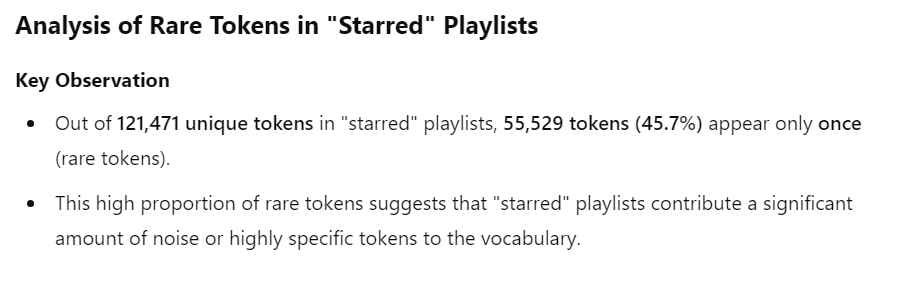

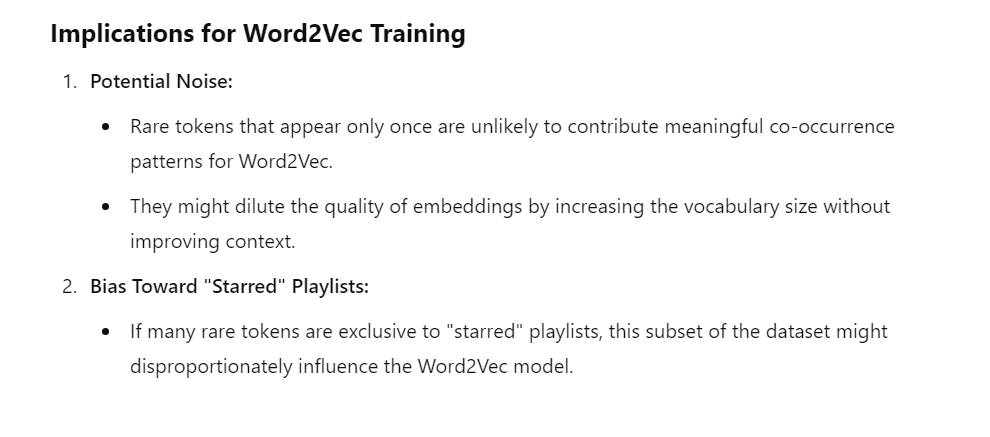

### Percentage of non-rare 'starred' tokens in the rest of the data: 98.90%


In [34]:
# Identify non-rare tokens in "starred" playlists
non_rare_starred_tokens = starred_token_counts[starred_token_counts > 1].index

# Extract tokens from the rest of the dataset (excluding "starred" playlists)
non_starred_playlists = df_final[df_final['playlistname'].str.lower() != 'starred']
non_starred_tokens = non_starred_playlists['trackname'].str.split().explode().unique()

# Find the intersection of tokens
common_tokens = set(non_rare_starred_tokens).intersection(set(non_starred_tokens))

# Calculate the percentage
percentage_common = (len(common_tokens) / len(non_rare_starred_tokens)) * 100

# Output results
print(f"Number of non-rare tokens in 'starred' playlists: {len(non_rare_starred_tokens)}")
print(f"Number of these tokens also in the rest of the data: {len(common_tokens)}")
print(f"Percentage of non-rare 'starred' tokens in the rest of the data: {percentage_common:.2f}%")


Number of non-rare tokens in 'starred' playlists: 65922
Number of these tokens also in the rest of the data: 65200
Percentage of non-rare 'starred' tokens in the rest of the data: 98.90%


### Explanation how the starred playlist has low impact on overall metadata and word2vec model

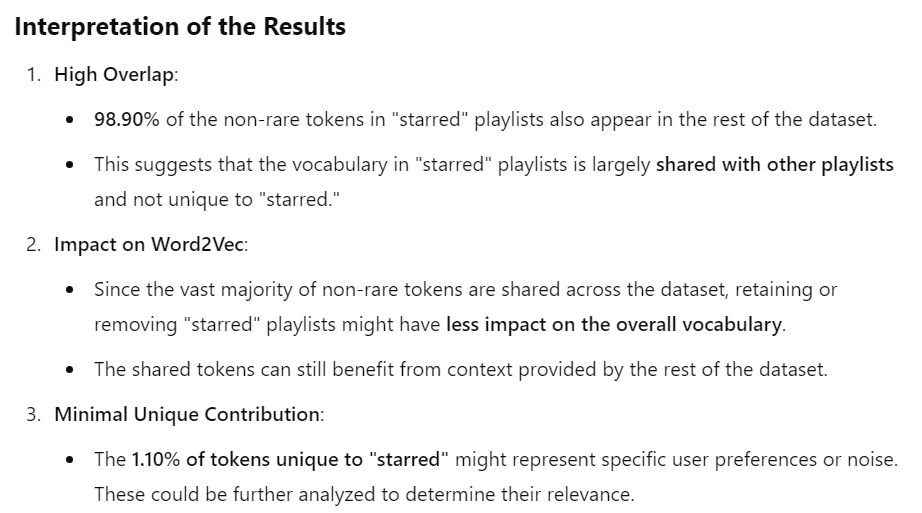

### Top 10 most common tokens in 'starred' playlists

Number of unique tokens in 'starred' playlists: 121451
Top 10 most common tokens in 'starred' playlists:
trackname
the        174439
you         69734
of          59360
i           55957
a           55695
in          52463
me          49498
version     47995
to          43883
love        42553
Name: count, dtype: int64


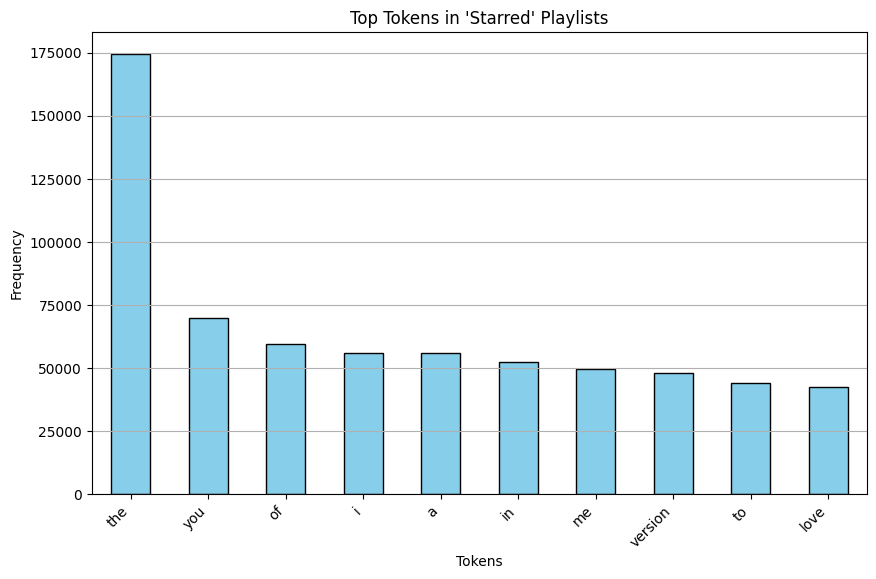

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter playlists named "starred"
starred_playlists = df_final[df_final['playlistname'].str.lower() == 'starred']

if not starred_playlists.empty:
    # Step 2: Extract tokens from 'trackname' in 'starred' playlists
    starred_tokens = starred_playlists['trackname'].str.split().explode()

    # Step 3: Count unique tokens
    unique_starred_tokens = starred_tokens.nunique()
    print(f"Number of unique tokens in 'starred' playlists: {unique_starred_tokens}")

    # Step 4: Top 10 most common tokens
    top_tokens = starred_tokens.value_counts().head(10)
    print("Top 10 most common tokens in 'starred' playlists:")
    print(top_tokens)

    # Step 5: Visualize top tokens
    plt.figure(figsize=(10, 6))
    top_tokens.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Top Tokens in 'Starred' Playlists")
    plt.xlabel("Tokens")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.show()
else:
    print("No playlists named 'starred' found in the dataset.")


### Percentage of rows with 'starred' playlist: 10.44%

In [24]:
# Count the number of rows with "starred" as the playlist name
starred_rows_count = df_final[df_final['playlistname'].str.lower() == 'starred'].shape[0]

# Calculate the total number of rows in df_final
total_rows = df_final.shape[0]

# Calculate the percentage
starred_percentage = (starred_rows_count / total_rows) * 100

print(f"Total rows in dataset: {total_rows}")
print(f"Rows with 'starred' playlist: {starred_rows_count}")
print(f"Percentage of rows with 'starred' playlist: {starred_percentage:.2f}%")


Total rows in dataset: 12743230
Rows with 'starred' playlist: 1330529
Percentage of rows with 'starred' playlist: 10.44%


### Number of users who chose ONLY 'starred': 587

In [8]:
# Step 1: Find users with only "starred" playlists
only_starred_users = df_final.groupby('user_id')['playlistname'].apply(lambda x: set(x.str.lower()) == {'starred'})

# Filter users who chose only "starred"
only_starred_users = only_starred_users[only_starred_users].index

# Step 2: Count and display the results
num_only_starred_users = len(only_starred_users)

print(f"Number of users who chose only 'starred': {num_only_starred_users}")
print("List of users who chose only 'starred':")
print(only_starred_users)


Number of users who chose only 'starred': 587
List of users who chose only 'starred':
Index(['00152c870313100559aad7b097d9c1f5', '004e1cd03ad00ebedf071ffd98665649',
       '0059ac6b3ba3c3f415f09059a3bd703a', '008ac656ed12da791d53ff9f20b17123',
       '009d6038a80daf642db5d1198b760c58', '0129886994c81e6fabc08e5ab2fa494b',
       '016a8eb7c9e5f511bd3749552ab19e56', '017f53f1df26e5adad6a0b93cef8f97b',
       '01ef80101c7c3126b0eab7d5b8071800', '02ac1d2720b551f943ab71f611de9492',
       ...
       'fb465982fe21db80a4bd4719aa80e41e', 'fc37c995a978d79c885f6195c0a360bb',
       'fc7e7592d3afdc92cfb033b1d4174afa', 'fc9922affe4ef68b48c9b01b61c37571',
       'fd94eb26d022a4e17726bbba299683da', 'fe01f365c5423a6d5f064342bec48b38',
       'feeba387444e26c1a1bcf0acf2230f2b', 'fef8fecef4e61a64b3ab7200f249233d',
       'fefb842b510211baa5d17af12d39f1b7', 'ff837f2820fc0d31472a77a6a56f111a'],
      dtype='object', name='user_id', length=587)


## Step 5: User analysis

### 1. Count Playlists per User

In [25]:
# Count the number of playlists per user
playlists_per_user = df_final.groupby('user_id')['playlistname'].nunique()

# Display summary statistics
print("Playlists per user statistics:")
print(playlists_per_user.describe())

# Top users with the most playlists
print("\nTop 10 users with the most playlists:")
print(playlists_per_user.sort_values(ascending=False).head(10))


Playlists per user statistics:
count    15864.000000
mean        14.498361
std         14.774742
min          1.000000
25%          3.000000
50%          8.000000
75%         22.000000
max        184.000000
Name: playlistname, dtype: float64

Top 10 users with the most playlists:
user_id
872a19d491f4357408551be6d7eea273    184
19ccdb5f2ce9193e6028923f65afaac2    105
57c4979b17f7563f83e69f09701eb584     76
39bd43df0c61c451361200312a4ab6e0     73
13c6654d04eb2e0c09671c8868393722     68
8b604df97432544b8788112f36bc2f07     67
3315b4b13f69b2b3931b0e18a4de512d     58
1dcaa0c136f62562a57acf67b4d0b27f     58
599977e70ddc103506191d0efe38f1b3     56
15af84959451245e028e61c331bdbff4     55
Name: playlistname, dtype: int64


### 2. Visualize Playlists per User

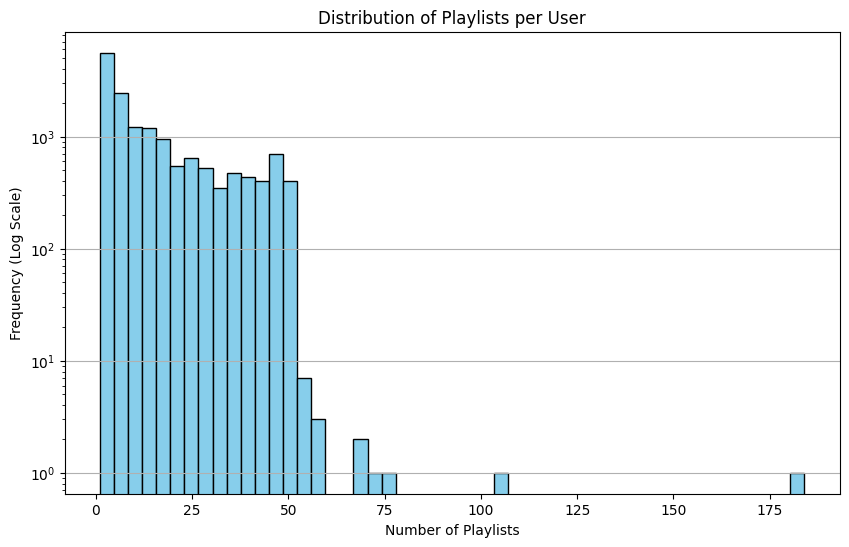

In [26]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(playlists_per_user, bins=50, log=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Playlists per User")
plt.xlabel("Number of Playlists")
plt.ylabel("Frequency (Log Scale)")
plt.grid(axis='y')
plt.show()


### 3. Count Tracks per User

In [27]:
# Count the number of tracks per user
tracks_per_user = df_final.groupby('user_id')['trackname'].nunique()

# Display summary statistics
print("Tracks per user statistics:")
print(tracks_per_user.describe())

# Top users with the most tracks
print("\nTop 10 users with the most tracks:")
print(tracks_per_user.sort_values(ascending=False).head(10))


Tracks per user statistics:
count     15864.000000
mean        695.698311
std        2058.579181
min           1.000000
25%          88.000000
50%         331.000000
75%         782.000000
max      186096.000000
Name: trackname, dtype: float64

Top 10 users with the most tracks:
user_id
4398de6902abde3351347b048fcdc287    186096
7ee2b92c5bcf6133b8132363e5bda960     78448
fa849dabeb14a2800ad5130907fc5018     47789
ed140fce438f59e6e07e5ee7bd726692     28958
99deafd9b792af8e6a535483088faef2     28853
c410ee930bd5f0e4893632503ec17b05     22942
32b524ed367b1e5a714228fbec80849d     20690
c0efe4e704a37894150489b25eac9042     20184
a9f844ceb4d928d7ff7c189211f301c5     19744
2fa1f93e57cfe2f6c4456e98da54061c     19007
Name: trackname, dtype: int64


### 4. Visualize Tracks per User

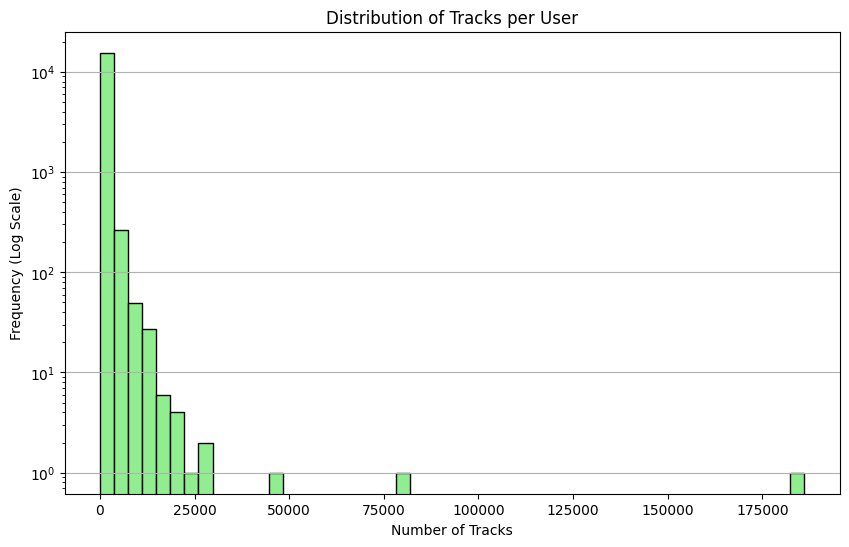

In [28]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(tracks_per_user, bins=50, log=True, color='lightgreen', edgecolor='black')
plt.title("Distribution of Tracks per User")
plt.xlabel("Number of Tracks")
plt.ylabel("Frequency (Log Scale)")
plt.grid(axis='y')
plt.show()


### 5. Top Users with "Starred" Playlists

In [29]:
# Filter for "starred" playlists
starred_users = df_final[df_final['playlistname'].str.lower() == 'starred']

# Count the number of "starred" playlists per user
starred_playlists_per_user = starred_users.groupby('user_id')['playlistname'].nunique()

print("Top 10 users with the most 'starred' playlists:")
print(starred_playlists_per_user.sort_values(ascending=False).head(10))


Top 10 users with the most 'starred' playlists:
user_id
000b0f32b5739f052b9d40fcc5c41079    1
ab8516d20963849fc81be7dac21a29ac    1
abfaf1cbf7b20c5e60915bea2c410f24    1
abe6a95b5cc93bbd11ea898963da50a3    1
abc451989719e1f01abd3b3c371c5b77    1
abb68f21d1fd7f0da73f59ac0d6c913e    1
abb4798b059858311c38c1e74a7b1e87    1
abad74dc8dd4e666166fafc5d3277b39    1
ab8d8ef535cd803db4e8fd6a27ab3f0f    1
ab7808569290a47946184b2b3bdb4c7d    1
Name: playlistname, dtype: int64


### 6. Percentage of Users with a Single Playlist

In [30]:
# Count playlists per user
single_playlist_users = (playlists_per_user == 1).sum()

# Calculate the percentage
percentage_single_playlist = (single_playlist_users / playlists_per_user.shape[0]) * 100

print(f"Number of users with a single playlist: {single_playlist_users}")
print(f"Percentage of users with a single playlist: {percentage_single_playlist:.2f}%")


Number of users with a single playlist: 2202
Percentage of users with a single playlist: 13.88%


### 7. Percentage of users who chose 'starred': 31.64%

In [32]:
# Total number of unique users
total_unique_users = df_final['user_id'].nunique()

# Filter rows with "starred" playlists and count unique users
starred_users_count = df_final[df_final['playlistname'].str.lower() == 'starred']['user_id'].nunique()

# Calculate percentage of users who chose "starred"
starred_users_percentage = (starred_users_count / total_unique_users) * 100

# Print results
print(f"Total unique users in df_final: {total_unique_users}")
print(f"Number of users who chose 'starred': {starred_users_count}")
print(f"Percentage of users who chose 'starred': {starred_users_percentage:.2f}%")


Total unique users in df_final: 15864
Number of users who chose 'starred': 5019
Percentage of users who chose 'starred': 31.64%


**### Summary about users and playlists in the metadata**

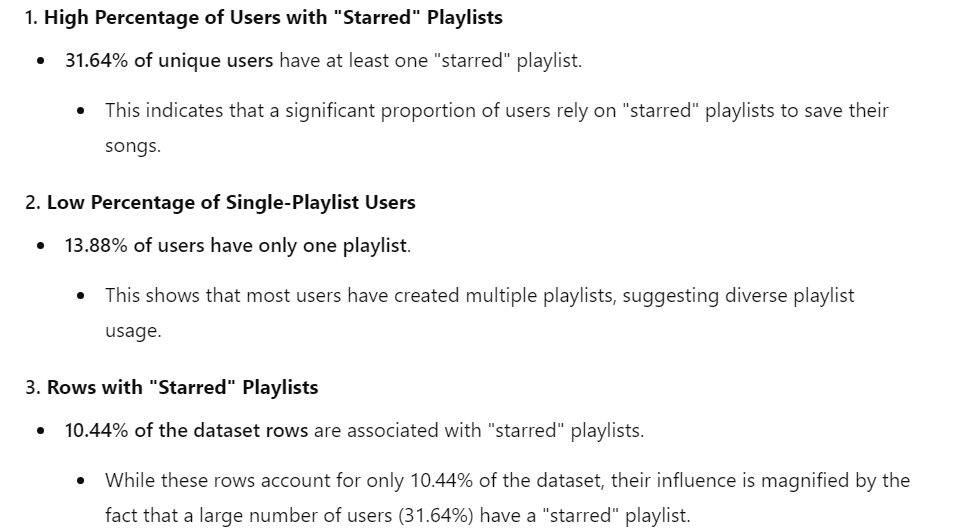

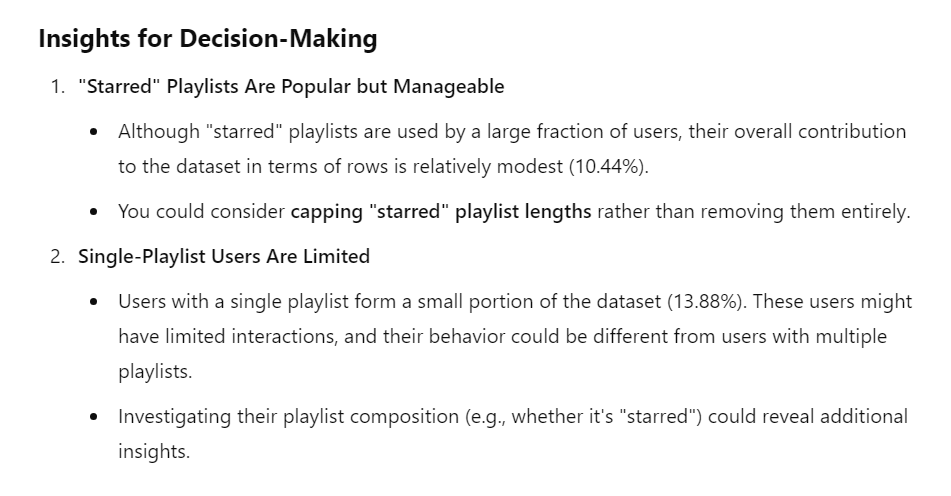

## Step 5: Handle Outliers



As explained before - 'Starred' is not a playlist but rather "liked-songs" by different users and because it is named the same for all users then all their liked songs go to 'starred'.

'Starred' has been found to have non-rare tokens that represent 98% of the data, so there will be a low impact to the token diversity if we choose to remove this playlist.

'Starred' is an outlier with 1,330,529 tracks.
it is generic and potentially has noisy nature.

By removing 'starred' playlist, then dataset size will be reduced without losing much diversity in user interactions.

### Saving the 'starred' playlists to df_starred.csv

In [10]:
# Extract rows with "starred" playlists
df_starred = df_final[df_final['playlistname'].str.lower() == 'starred']

# Save the "starred" playlists to a CSV file
df_starred.to_csv('df_starred.csv', index=False)

print(f"'Starred' playlists saved as 'df_starred.csv'.")
print(f"Number of rows with 'starred' playlists: {df_starred.shape[0]}")
print(f"Number of unique users with 'starred' playlists: {df_starred['user_id'].nunique()}")


'Starred' playlists saved as 'df_starred.csv'.
Number of rows with 'starred' playlists: 1330529
Number of unique users with 'starred' playlists: 5019


### Removing 'starred' playlist (creating: df_without_starred.csv)


In [9]:
# Remove rows with "starred" playlists
df_without_starred = df_final[df_final['playlistname'].str.lower() != 'starred']

# Save the cleaned dataset to a CSV file
df_without_starred.to_csv('df_without_starred.csv', index=False)

print(f"Dataset without 'starred' playlists saved as 'df_without_starred.csv'.")
print(f"Number of rows after removing 'starred': {df_without_starred.shape[0]}")
print(f"Number of unique users after removing 'starred': {df_without_starred['user_id'].nunique()}")


Dataset without 'starred' playlists saved as 'df_without_starred.csv'.
Number of rows after removing 'starred': 11412701
Number of unique users after removing 'starred': 15277


In [11]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df_without_starred.shape)

# Display the basic information about the DataFrame
print("\nBasic Info:")
print(df_without_starred.info())

# Display the first few rows for a quick check
print("\nFirst 5 rows:")
print(df_without_starred.head())

Shape of the DataFrame: (11412701, 4)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 11412701 entries, 0 to 12743251
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   artistname    object
 2   trackname     object
 3   playlistname  object
dtypes: object(4)
memory usage: 435.4+ MB
None

First 5 rows:
                            user_id                       artistname  \
0  9cc0cfd4d7d7885102480dd99e7a90d6                   elvis costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  elvis costello  the attractions   
2  9cc0cfd4d7d7885102480dd99e7a90d6                     tiffany page   
3  9cc0cfd4d7d7885102480dd99e7a90d6  elvis costello  the attractions   
4  9cc0cfd4d7d7885102480dd99e7a90d6                   elvis costello   

                                          trackname    playlistname  
0                the angels wanna wear my red shoes  hard rock 2010  
1  whats so funny bout peace love and understandi

# Data Preparation

## Step 5: Tokenize Playlists

In [15]:
# Aggregate user data
user_data = df_without_starred.groupby('user_id')['trackname'].apply(list).reset_index()
user_data.columns = ['user_id', 'track_sequences']

# Normalize track names (lowercase, strip, and remove rare tokens)
from collections import Counter
track_counter = Counter([track for tracks in user_data['track_sequences'] for track in tracks])
rare_threshold = 5
common_tracks = {track for track, count in track_counter.items() if count >= rare_threshold}

# Filter rare tracks
user_data['filtered_sequences'] = user_data['track_sequences'].apply(
    lambda seq: [track.lower().strip() for track in seq if track in common_tracks]
)

# Save the processed user data
user_data.to_csv('user_data_for_word2vec.csv', index=False)
print("User data saved for Word2Vec training: user_data_for_word2vec.csv")


User data saved for Word2Vec training: user_data_for_word2vec.csv


In [16]:
import pandas as pd

# Create a dictionary of user_id and artist-song pairs
user_playlist_dict = (
    df_without_starred.groupby('user_id')
    .apply(lambda x: [(artist, song) for artist, song in zip(x['artistname'], x['trackname'])])
    .to_dict()
)

# Print an example user
example_user = next(iter(user_playlist_dict))  # Get one example user_id
print(f"Example user_id: {example_user}")
print(f"Artist-Song list for this user: {user_playlist_dict[example_user]}")

# Save the dictionary to a JSON file for further use
import json
with open('user_playlist_dict.json', 'w') as f:
    json.dump(user_playlist_dict, f)

print("User-Playlist dictionary saved as 'user_playlist_dict.json'.")


<ipython-input-16-cc622c7521e0>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: [(artist, song) for artist, song in zip(x['artistname'], x['trackname'])])


Example user_id: 00055176fea33f6e027cd3302289378b
Artist-Song list for this user: [('jannik brunke', '18'), ('green day', '21 guns'), ('shawn mendes', 'a little too much'), ('one direction', 'act my age'), ('blink182', 'after midnight'), ('meghan trainor', 'all about that bass'), ('ed sheeran', 'all of the stars'), ('green day', 'american idiot'), ('maroon 5', 'animals'), ('against the current', 'another you another way'), ('bmike', 'baby dont cut'), ('all time low', 'backseat serenade'), ('meghan tonjes', 'blank space'), ('charli xcx', 'boom clap'), ('little mix', 'boy'), ('all time low', 'break your little heart'), ('high school musical cast', 'breaking free'), ('the cat empire', 'brighter than gold'), ('shawn mendes', 'bring it back'), ('gerard way', 'brother'), ('onerepublic', 'burning bridges'), ('fall out boy', 'centuries'), ('little mix', 'change your life'), ('the 1975', 'chocolate'), ('against the current', 'closer faster'), ('all time low', 'dear maria count me in'), ('5 seco

## Step 6: Add Playlist Diversity Analysis

Analyze the diversity of playlists based on unique artists or tracks.


In [ ]:
# Unique tracks per playlist
unique_tracks = df_final.groupby('playlistname')['trackname'].nunique()
unique_tracks.to_csv('unique_tracks_per_playlist.csv')

# Unique artists per playlist
unique_artists = df_final.groupby('playlistname')['artistname'].nunique()
unique_artists.to_csv('unique_artists_per_playlist.csv')

# Display diversity statistics
print("Playlist Diversity (Tracks):")
print(unique_tracks.describe())

print("\nPlaylist Diversity (Artists):")
print(unique_artists.describe())


Playlist Diversity (Tracks):
count    134706.000000
mean         40.956223
std          63.460383
min           1.000000
25%          11.000000
50%          18.000000
75%          41.000000
max         500.000000
Name: trackname, dtype: float64

Playlist Diversity (Artists):
count    134706.000000
mean         17.358796
std          32.804332
min           1.000000
25%           1.000000
50%           4.000000
75%          19.000000
max         423.000000
Name: artistname, dtype: float64


## Step 7: Save Final Processed Dataset


In [ ]:
# Save the final processed dataset
df_final.to_csv('final_processed_dataset.csv', index=False)
print("Final processed dataset saved: final_processed_dataset.csv")


Final processed dataset saved: final_processed_dataset.csv


# Direct link to final_processed_dataset.csv

In [ ]:
import gdown
import pandas as pd

# Define the Google Drive file ID
file_id = '1oQLx5XhVwVnechbF-HZrysEETe88Oj51'
# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output CSV file path
output_csv_path = 'final_processed_dataset.csv'

# Download the file using gdown
gdown.download(download_url, output_csv_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1oQLx5XhVwVnechbF-HZrysEETe88Oj51
From (redirected): https://drive.google.com/uc?export=download&id=1oQLx5XhVwVnechbF-HZrysEETe88Oj51&confirm=t&uuid=d33744ea-0d6b-4f4e-9eb4-f1e6a483bcde
To: /content/final_processed_dataset.csv
100%|██████████| 529M/529M [00:04<00:00, 114MB/s]


'final_processed_dataset.csv'

In [ ]:
import pandas as pd

# Path to the processed dataset
processed_data_path = 'final_processed_dataset.csv'

# Read the dataset into a DataFrame
df_processed = pd.read_csv(processed_data_path)

# Display basic information
print(df_processed.info())

# Display the first few rows
print(df_processed.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6177045 entries, 0 to 6177044
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   artistname    object
 2   trackname     object
 3   playlistname  object
dtypes: object(4)
memory usage: 188.5+ MB
None
                            user_id                       artistname  \
0  9cc0cfd4d7d7885102480dd99e7a90d6                   elvis costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  elvis costello  the attractions   
2  9cc0cfd4d7d7885102480dd99e7a90d6                     tiffany page   
3  9cc0cfd4d7d7885102480dd99e7a90d6  elvis costello  the attractions   
4  9cc0cfd4d7d7885102480dd99e7a90d6                   elvis costello   

                                          trackname    playlistname  
0                the angels wanna wear my red shoes  hard rock 2010  
1  whats so funny bout peace love and understanding  hard rock 2010  
2                                  7 years

## df_processed analysis

In [ ]:
# Basic structure and info
print(df_processed.info())
print("Dataset shape:", df_processed.shape)

# First and last rows
print("First 5 rows:\n", df_processed.head())
print("Last 5 rows:\n", df_processed.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6177045 entries, 0 to 6177044
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   artistname    object
 2   trackname     object
 3   playlistname  object
dtypes: object(4)
memory usage: 188.5+ MB
None
Dataset shape: (6177045, 4)
First 5 rows:
                             user_id                       artistname  \
0  9cc0cfd4d7d7885102480dd99e7a90d6                   elvis costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  elvis costello  the attractions   
2  9cc0cfd4d7d7885102480dd99e7a90d6                     tiffany page   
3  9cc0cfd4d7d7885102480dd99e7a90d6  elvis costello  the attractions   
4  9cc0cfd4d7d7885102480dd99e7a90d6                   elvis costello   

                                          trackname    playlistname  
0                the angels wanna wear my red shoes  hard rock 2010  
1  whats so funny bout peace love and understanding  hard rock 2010  

In [ ]:
# Missing values per column
print("Missing values per column:\n", df_processed.isnull().sum())


Missing values per column:
 user_id          0
artistname       1
trackname       14
playlistname     0
dtype: int64


In [ ]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df_processed.duplicated().sum()}")


Number of duplicate rows: 3432


In [ ]:
# Unique values in key columns
print("Unique playlists:", df_processed['playlistname'].nunique())
print("Unique tracks:", df_processed['trackname'].nunique())
print("Unique artists:", df_processed['artistname'].nunique())


Unique playlists: 134706
Unique tracks: 1180142
Unique artists: 193037


Playlist Length Statistics:
 count    134706.000000
mean         45.855649
std          68.919976
min           1.000000
25%          11.000000
50%          20.000000
75%          48.000000
max         500.000000
Name: trackname, dtype: float64


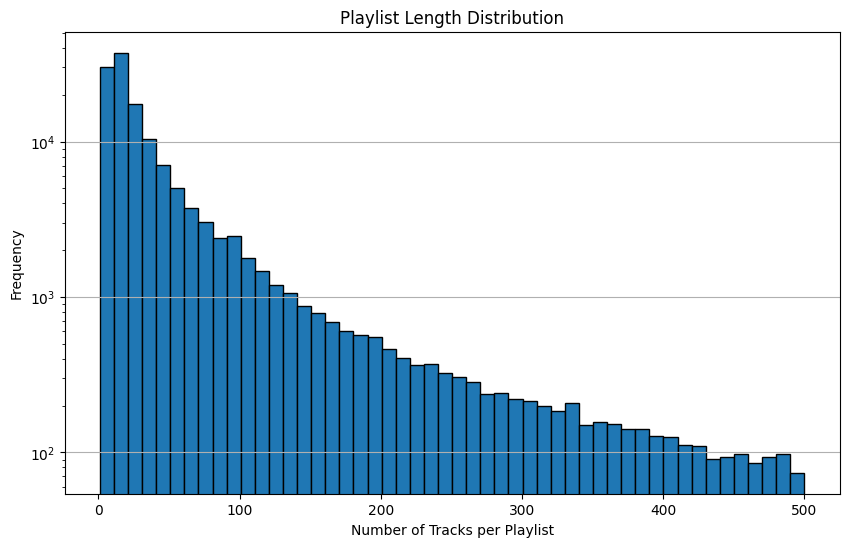

In [ ]:
# Calculate playlist lengths
playlist_lengths = df_processed.groupby('playlistname')['trackname'].count()

# Summary statistics
print("Playlist Length Statistics:\n", playlist_lengths.describe())

# Visualize distribution
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(10, 6))
playlist_lengths.plot(kind='hist', bins=50, edgecolor='black', logy=True)
plt.title('Playlist Length Distribution')
plt.xlabel('Number of Tracks per Playlist')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


Top 10 Artists:
 artistname
coldplay              14282
daft punk             13472
kanye west            13469
jay z                 12943
michael jackson       12090
david bowie           11710
rihanna               11693
david guetta          11612
the rolling stones    10865
bruce springsteen     10736
Name: count, dtype: int64
Top 10 Tracks:
 trackname
intro          3795
home           3271
closer         1891
hold on        1759
stay           1710
runaway        1678
radioactive    1643
forever        1630
wake me up     1628
happy          1587
Name: count, dtype: int64


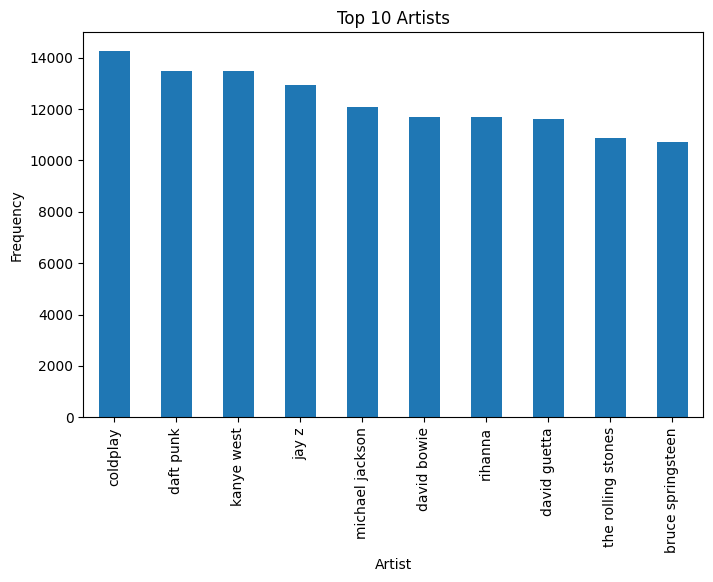

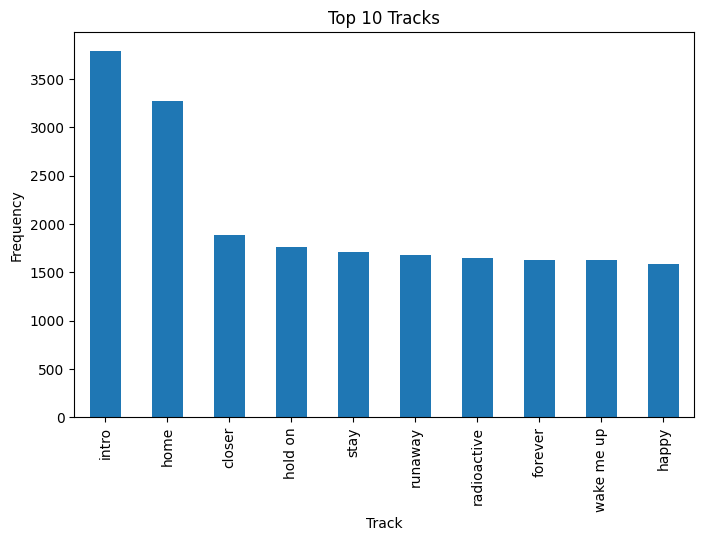

In [ ]:
# Top 10 most frequent artists
top_artists = df_processed['artistname'].value_counts().head(10)
print("Top 10 Artists:\n", top_artists)

# Top 10 most frequent tracks
top_tracks = df_processed['trackname'].value_counts().head(10)
print("Top 10 Tracks:\n", top_tracks)

# Visualize
top_artists.plot(kind='bar', title='Top 10 Artists', ylabel='Frequency', xlabel='Artist', figsize=(8, 5))
plt.show()

top_tracks.plot(kind='bar', title='Top 10 Tracks', ylabel='Frequency', xlabel='Track', figsize=(8, 5))
plt.show()


In [ ]:
# Unique tracks per playlist
unique_tracks = df_processed.groupby('playlistname')['trackname'].nunique()
print("Playlist Diversity (Tracks):\n", unique_tracks.describe())

# Unique artists per playlist
unique_artists = df_processed.groupby('playlistname')['artistname'].nunique()
print("Playlist Diversity (Artists):\n", unique_artists.describe())

# Save diversity metrics
unique_tracks.to_csv('unique_tracks_per_playlist.csv')
unique_artists.to_csv('unique_artists_per_playlist.csv')


Playlist Diversity (Tracks):
 count    134706.000000
mean         40.956223
std          63.460383
min           1.000000
25%          11.000000
50%          18.000000
75%          41.000000
max         500.000000
Name: trackname, dtype: float64
Playlist Diversity (Artists):
 count    134706.000000
mean         17.358796
std          32.804332
min           1.000000
25%           1.000000
50%           4.000000
75%          19.000000
max         423.000000
Name: artistname, dtype: float64


Track Repetition Statistics:
 count    1.180142e+06
mean     5.234142e+00
std      2.483088e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      3.795000e+03
Name: count, dtype: float64


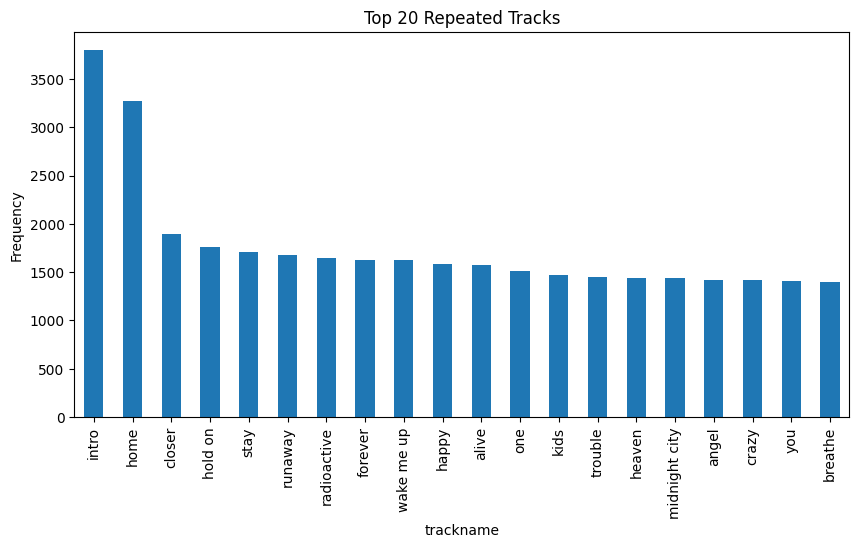

In [ ]:
# Check how often each track appears
track_repetition = df_processed['trackname'].value_counts()

# Summary statistics
print("Track Repetition Statistics:\n", track_repetition.describe())

# Visualize
track_repetition.head(20).plot(kind='bar', figsize=(10, 5), title='Top 20 Repeated Tracks')
plt.ylabel('Frequency')
plt.show()


Artist-Track Statistics:
 count    193037.000000
mean          8.516264
std          32.764871
min           0.000000
25%           1.000000
50%           1.000000
75%           5.000000
max        4261.000000
Name: trackname, dtype: float64
Top 10 Artists with Most Unique Tracks:
 artistname
johann sebastian bach      4261
various artists            3858
grateful dead              2637
wolfgang amadeus mozart    2453
ludwig van beethoven       2073
frank sinatra              1779
vitamin string quartet     1669
antonio vivaldi            1548
george frideric handel     1489
david bowie                1220
Name: trackname, dtype: int64


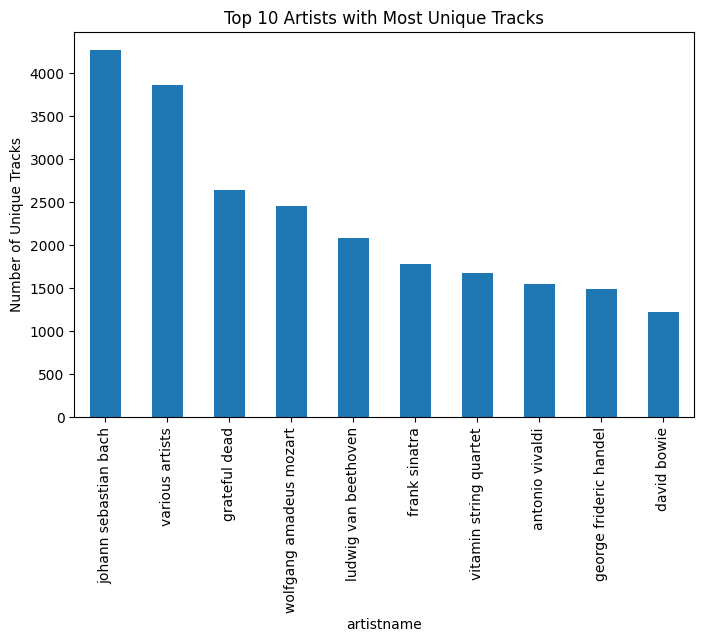

In [ ]:
# Group tracks by artist
artist_track_counts = df_processed.groupby('artistname')['trackname'].nunique()
print("Artist-Track Statistics:\n", artist_track_counts.describe())

# Top 10 artists with the most unique tracks
top_artists_tracks = artist_track_counts.sort_values(ascending=False).head(10)
print("Top 10 Artists with Most Unique Tracks:\n", top_artists_tracks)

# Visualize
top_artists_tracks.plot(kind='bar', figsize=(8, 5), title='Top 10 Artists with Most Unique Tracks')
plt.ylabel('Number of Unique Tracks')
plt.show()


Playlists Per User Statistics:
 count    14356.000000
mean        13.073697
std         13.519237
min          1.000000
25%          2.000000
50%          7.000000
75%         20.000000
max        181.000000
Name: playlistname, dtype: float64


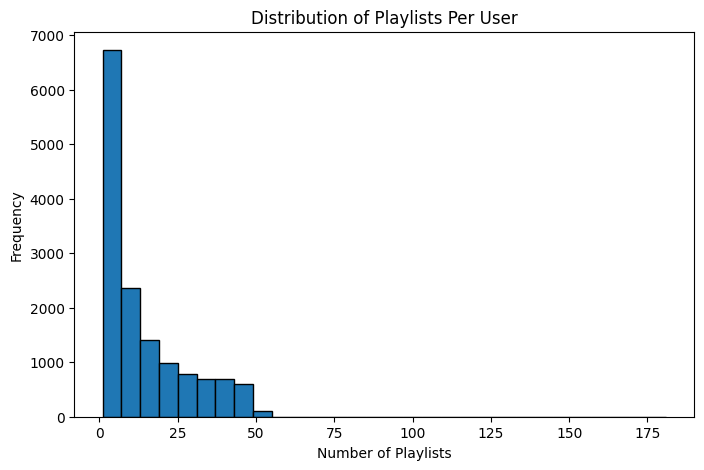

In [ ]:
# Number of playlists per user
playlists_per_user = df_processed.groupby('user_id')['playlistname'].nunique()
print("Playlists Per User Statistics:\n", playlists_per_user.describe())

# Visualize
playlists_per_user.plot(kind='hist', bins=30, figsize=(8, 5), edgecolor='black')
plt.title('Distribution of Playlists Per User')
plt.xlabel('Number of Playlists')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Tracks per playlist
tracks_per_playlist = df_processed.groupby('playlistname')['trackname'].count()
print("Tracks per Playlist Statistics:\n", tracks_per_playlist.describe())


Tracks per Playlist Statistics:
 count    134706.000000
mean         45.855649
std          68.919976
min           1.000000
25%          11.000000
50%          20.000000
75%          48.000000
max         500.000000
Name: trackname, dtype: float64


In [ ]:
# Group tracks by playlist as tokenized sequences
tokenized_playlists = df_processed.groupby('playlistname')['trackname'].apply(list)
print("Example of Tokenized Playlist:\n", tokenized_playlists.head())

# Save tokenized playlists for modeling
tokenized_playlists.to_csv('tokenized_playlists.csv')


Example of Tokenized Playlist:
 playlistname
                 [ace of spades, be quick or be dead  1998 rema...
                 [       ,    3 ,   ,    ,        ,     ,      ...
                 [62, a billion kilograms, anjou  original mix,...
  cristy         [aint she sweet, alone again naturally, ave ma...
  dance          [2fly, acid kills, adagio for strings, ai se e...
Name: trackname, dtype: object
